<center><h1>Human Development Index</h1></center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read Data

In [2]:
life_expectancy_income_df = pd.read_csv('data/life-expectancy-income.csv')
life_expectancy_income_df.head()

,District,Life expectancy(In Years),Per Capita Income(In USD),Unnamed: 3
0,Ramechhap,72.90,951,NaN
1,Gorkha,71.70,"1,039",NaN
2,Saptari,71.34,801,NaN
3,Siraha,71.29,689,NaN
4,Rautahat,70.99,757,NaN


In [3]:
life_expectancy_income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 4 columns):
District                     75 non-null object
Life expectancy(In Years)    75 non-null float64
Per Capita Income(In USD)    75 non-null object
Unnamed: 3                   0 non-null float64
dtypes: float64(2), object(2)
memory usage: 2.5+ KB


Dataframe contains unnamed column with all NaN values, so this column is dropped.

In [4]:
life_expectancy_income_df = life_expectancy_income_df.loc[:, ~life_expectancy_income_df.columns.str.contains('^Unnamed')]
life_expectancy_income_df.head()

,District,Life expectancy(In Years),Per Capita Income(In USD)
0,Ramechhap,72.90,951
1,Gorkha,71.70,"1,039"
2,Saptari,71.34,801
3,Siraha,71.29,689
4,Rautahat,70.99,757


In [5]:
literacy_rate_df = pd.read_csv('data/literacy-rates.csv')
literacy_rate_df.head()

,District,Total,Female,Male,Year
0,Kathmandu,86.3,79.8,92.2,2013
1,Lalitpur,82.5,74.7,90.1,2013
2,Kaski,82.4,75.4,90.1,2013
3,Bhaktapur,81.7,72.7,90.5,2013
4,Ilam,77.9,72.0,84.2,2013


In [6]:
literacy_rate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 5 columns):
District    75 non-null object
Total       75 non-null float64
Female      75 non-null float64
Male        75 non-null float64
 Year       75 non-null int64
dtypes: float64(3), int64(1), object(1)
memory usage: 3.1+ KB


Both datasets have 75 districts. Checking if district names are same in both the datasets.

In [7]:
print(set(life_expectancy_income_df['District']).difference(set(literacy_rate_df['District'])))

{'Saptari', 'Lamjung', 'Lalitpur', 'Mugu', 'Palpa', 'Panchthar', 'Ilam', 'Pyuthan', 'Morang', 'Myagdi', 'Dolpa', 'Parbat', 'Sindhupalchok', 'Taplejung', 'Humla', 'Bara', 'Jhapa', 'Solukhumbu', 'Manang', 'Rautahat', 'Sunsari', 'Nawalparasi', 'Ramechhap', 'Surkhet', 'Bardiya', 'Gorkha', 'Siraha', 'Dadeldhura', 'Salyan', 'Achham', 'Dolakha', 'Udayapur', 'Rupandehi', 'Jumla', 'Rukum', 'Kaski', 'Bhaktapur', 'Kanchanpur', 'Khotang', 'Sarlahi', 'Dang', 'Okhaldhunga', 'Dhanusa', 'Banke', 'Kapilbastu', 'Sindhuli', 'Dhading', 'Gulmi', 'Tehrathum', 'Baitadi', 'Arghakhanchi', 'Mustang', 'Syangja', 'Parsa', 'Nuwakot', 'Kailali', 'Kathmandu', 'Tanahu', 'Kavrepalanchok', 'Kalikot', 'Dailekh', 'Rolpa', 'Rasuwa', 'Makwanpur', 'Bajhang', 'Jajarkot', 'Bhojpur', 'Bajura', 'Mahottari', 'Darchula', 'Dhankuta', 'Sankhuwasabha', 'Doti', 'Chitwan', 'Baglung'}


In [8]:
print(set(literacy_rate_df['District']).difference(set(life_expectancy_income_df['District'])))

{'Rukum ', 'Mahottari ', 'Baglung ', 'Kanchanpur ', 'Kathmandu ', 'Banke ', 'Jumla ', 'Myagdi ', 'Rolpa ', 'Panchthar ', 'Pyuthan ', 'Salyan ', 'Bajhang ', 'Rupandehi ', 'Kailali ', 'Parbat ', 'Sindhupalchok ', 'Kaski ', 'Bhojpur ', 'Darchula ', 'Dang ', 'Dhading ', 'Sindhuli ', 'Kalikot ', 'Palpa ', 'Siraha ', 'Dhanusa ', 'Ilam ', 'Morang ', 'Doti ', 'Manang ', 'Udayapur ', 'Nuwakot ', 'Gulmi ', 'Gorkha ', 'Dolpa ', 'Sunsari ', 'Bhaktapur ', 'Makwanpur ', 'Ramechhap ', 'Tanahu ', 'Humla ', 'Chitawan ', 'Sankhuwasabha ', 'Sarlahi ', 'Nawalparasi ', 'Bardiya ', 'Parsa ', 'Dailekh ', 'Arghakhanchi ', 'Mustang ', 'Dhankuta ', 'Syangja ', 'Rasuwa ', 'Bajura ', 'Bara ', 'Rautahat ', 'Terhathum ', 'Jajarkot ', 'Mugu ', 'Dadeldhura ', 'Achham ', 'Baitadi ', 'Lamjung ', 'Khotang ', 'Kavrepalanchok ', 'Taplejung ', 'Okhaldhunga ', 'Surkhet ', 'Solukhumbu ', 'Jhapa ', 'Dolakha ', 'Saptari ', 'Lalitpur ', 'Kapilbastu '}


In [9]:
print(set(literacy_rate_df['District']))

{'Rukum ', 'Mahottari ', 'Baglung ', 'Kathmandu ', 'Kanchanpur ', 'Banke ', 'Jumla ', 'Myagdi ', 'Rolpa ', 'Panchthar ', 'Pyuthan ', 'Salyan ', 'Bajhang ', 'Rupandehi ', 'Kailali ', 'Parbat ', 'Sindhupalchok ', 'Kaski ', 'Dang ', 'Bhojpur ', 'Darchula ', 'Dhading ', 'Sindhuli ', 'Kalikot ', 'Palpa ', 'Siraha ', 'Dhanusa ', 'Ilam ', 'Morang ', 'Doti ', 'Manang ', 'Udayapur ', 'Nuwakot ', 'Gulmi ', 'Gorkha ', 'Dolpa ', 'Sunsari ', 'Bhaktapur ', 'Makwanpur ', 'Ramechhap ', 'Tanahu ', 'Humla ', 'Chitawan ', 'Sankhuwasabha ', 'Sarlahi ', 'Nawalparasi ', 'Bardiya ', 'Parsa ', 'Dailekh ', 'Arghakhanchi ', 'Mustang ', 'Dhankuta ', 'Syangja ', 'Rasuwa ', 'Bajura ', 'Bara ', 'Rautahat ', 'Terhathum ', 'Jajarkot ', 'Mugu ', 'Dadeldhura ', 'Achham ', 'Baitadi ', 'Kapilbastu ', 'Lamjung ', 'Khotang ', 'Kavrepalanchok ', 'Taplejung ', 'Okhaldhunga ', 'Surkhet ', 'Jhapa ', 'Dolakha ', 'Saptari ', 'Lalitpur ', 'Solukhumbu '}


All district names are different because of the trailing space in district names in literacy rate dataframe.

In [10]:
literacy_rate_df['District'] = literacy_rate_df['District'].map(lambda x : x.strip())

In [11]:
print(set(life_expectancy_income_df['District']).difference(set(literacy_rate_df['District'])))

{'Tehrathum', 'Chitwan'}


In [12]:
print(set(literacy_rate_df['District']).difference(set(life_expectancy_income_df['District'])))

{'Chitawan', 'Terhathum'}


Still two district names are mismatched.

In [13]:
literacy_rate_df['District'] = literacy_rate_df['District'].map(lambda x : 'Chitwan' if x == 'Chitawan' else ('Tehrathum' if x == 'Terhathum' else x))

In [14]:
print(set(life_expectancy_income_df['District']).difference(set(literacy_rate_df['District'])))

set()


Finally all district names are same. The two dataframes can now be merged based on the district name.

## Merge Dataframes

In [15]:
district_df = pd.merge(life_expectancy_income_df, literacy_rate_df, on='District', how='inner')
district_df.head()

,District,Life expectancy(In Years),Per Capita Income(In USD),Total,Female,Male,Year
0,Ramechhap,72.90,951,62.2,53.5,72.6,2013
1,Gorkha,71.70,"1,039",66.3,59.4,75.1,2013
2,Saptari,71.34,801,54.5,42.6,67.0,2013
3,Siraha,71.29,689,50.2,39.2,61.9,2013
4,Rautahat,70.99,757,41.7,32.0,50.9,2013


In [16]:
district_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 0 to 74
Data columns (total 7 columns):
District                     75 non-null object
Life expectancy(In Years)    75 non-null float64
Per Capita Income(In USD)    75 non-null object
Total                        75 non-null float64
Female                       75 non-null float64
Male                         75 non-null float64
 Year                        75 non-null int64
dtypes: float64(4), int64(1), object(2)
memory usage: 4.7+ KB


Since life expectancy and per capita income are not grouped by gender, I used only the total literacy rate and drop the columns for female and male. Also the year column doesn't provide us additional information. So, the year column is also dropped. The total column is renamed to Literacy Rate. 

In [17]:
district_df.rename(columns={'Total':'Literacy Rate'}, inplace=True)
district_df.drop(columns=['Female', 'Male', ' Year'], inplace=True)
district_df.head()

,District,Life expectancy(In Years),Per Capita Income(In USD),Literacy Rate
0,Ramechhap,72.90,951,62.2
1,Gorkha,71.70,"1,039",66.3
2,Saptari,71.34,801,54.5
3,Siraha,71.29,689,50.2
4,Rautahat,70.99,757,41.7


## Exploring additional datasets

#### 1. Education level for people 5 years and older

In [18]:
literate_five_and_above_df = pd.read_csv('data/literate-population-aged-5-years-and-above-by-educational-attainment.csv')
literate_five_and_above_df.head()

,Province,Sex,Total,Population that have completed the educational level of Beginner,Population that have completed the educational level of Primary\n(1-5),Population that have completed the educational level of Lower secondary (6 -8),Population that have completed the educational level of Secondary\n(9 -10),Population that have completed the educational level of S.L.C. & equiv.,Population that have completed the educational level of Inter- mediate & equiv.,Population that have completed the educational level of Graduate\n& equiv.,Population that have completed the educational level of Post Graduate\nequiv. & above,Others,Non- formal education,Level not stated
0,Province 1,Both Sex,2988776,99806,1120561,633306,398192,356169,150936,58514,15921,1296,143515,10560
1,Province 1,Male,1578675,52926,592289,325131,205382,185536,85278,40844,12600,746,72464,5479
2,Province 1,Female,1410101,46880,528272,308175,192810,170633,65658,17670,3321,550,71051,5081
3,Province 2,Both Sex,2428176,72057,1089642,485560,267899,228383,142694,62100,14703,5593,37049,22496
4,Province 2,Male,1476232,40493,613570,297429,178390,152063,97277,47990,12284,2941,20970,12825


In [19]:
literate_five_and_above_df.shape

(24, 14)

In [20]:
print(set(literate_five_and_above_df['Province']))

{'Gandaki', 'Nepal', 'Province 7', 'Province 1', 'Province 5', 'Karnali', 'Province 2', 'Province 3'}


District level information not available in this dataset, so I didn't use this dataset further.

#### 2. Population by federal units

In [21]:
population_df = pd.read_csv('data/total-population-by-sex-country-province-district-and-local-level-population.csv')
population_df.head()

,Name\n,year,parent_level,geo_level,parent_code,sex,population
0,Nepal,2016,-,country,-,female,13645463
1,Nepal,2016,-,country,-,male,12849041
2,Province No. 1,2016,country,province,NP,female,2368407
3,Province No. 1,2016,country,province,NP,male,2166536
4,Province No. 2,2016,country,province,NP,female,2686207


In [22]:
print(set(population_df['year']))

{2016}


All data in this dataset are from the year 2016, while our data in the literacy rate was from 2013. Due to this mismatch, this dataset is not further used.

#### 3. Number of federal units

In [23]:
federal_structure_df = pd.read_csv('data/total-number-of-rural-municipality-and-municipality-and-ward-divisions-in-federal-structure-in-2.csv')
federal_structure_df.head()

,District,Metropolitan (Numbers),Metropolitan (No of Wards),Sub Metropolitan(Numbers),Sub Metropolitan(No of Wards),Municipality(Numbers),Municipality(No of Wards),Rural Municipality(Numbers),Rural Municipality(No of Wards),Total Units,Total No of Wards
0,Taplejung,0,0.0,0,0,1,11,8,50,9,61
1,Panchthar,0,0.0,0,0,1,14,7,46,8,60
2,Ilam,0,0.0,0,0,4,45,6,36,10,81
3,Jhapa,0,0.0,0,0,8,85,7,46,15,131
4,Morang,1,19.0,0,0,8,79,8,61,17,159


In [24]:
federal_structure_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 11 columns):
District                           78 non-null object
Metropolitan (Numbers)             78 non-null int64
Metropolitan (No of Wards)         77 non-null float64
Sub Metropolitan(Numbers)          78 non-null int64
Sub Metropolitan(No of Wards)      78 non-null int64
Municipality(Numbers)              78 non-null int64
Municipality(No of Wards)          78 non-null object
Rural Municipality(Numbers)        78 non-null int64
Rural Municipality(No of Wards)    78 non-null object
Total Units                        78 non-null int64
Total No of Wards                  78 non-null object
dtypes: float64(1), int64(6), object(4)
memory usage: 6.8+ KB


In [25]:
print(set(federal_structure_df['District']).difference(set(district_df['District'])))

{'Nawalparasi Bardaghat Susta East', 'Tehathum', 'Okhaldhung', 'Sindhupalchowk', 'Makawanpur', 'Myagdhi', 'Syanjha', 'Chitawan', 'Rukum West', 'Total', 'Ramechap', 'Nawalparasi Bardadhghat Susta west', 'Kavrepalanchowk', 'Rukum East'}


federal_structure_df has new districts Rukum East, Rukum West, Nawalparasi Bardadhghat Susta west and Nawalparasi Bardaghat Susta East which suggests that this data is also from later than 2013. So this dataset is also further not used.

In [26]:
district_df.head()

,District,Life expectancy(In Years),Per Capita Income(In USD),Literacy Rate
0,Ramechhap,72.90,951,62.2
1,Gorkha,71.70,"1,039",66.3
2,Saptari,71.34,801,54.5
3,Siraha,71.29,689,50.2
4,Rautahat,70.99,757,41.7


In [27]:
district_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 0 to 74
Data columns (total 4 columns):
District                     75 non-null object
Life expectancy(In Years)    75 non-null float64
Per Capita Income(In USD)    75 non-null object
Literacy Rate                75 non-null float64
dtypes: float64(2), object(2)
memory usage: 2.9+ KB


In [28]:
district_df['Per Capita Income(In USD)'] = district_df['Per Capita Income(In USD)'].map(lambda x : float(x.replace(',','')))

In [29]:
district_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 0 to 74
Data columns (total 4 columns):
District                     75 non-null object
Life expectancy(In Years)    75 non-null float64
Per Capita Income(In USD)    75 non-null float64
Literacy Rate                75 non-null float64
dtypes: float64(3), object(1)
memory usage: 2.9+ KB


In [30]:
district_df.head()

,District,Life expectancy(In Years),Per Capita Income(In USD),Literacy Rate
0,Ramechhap,72.90,951.0,62.2
1,Gorkha,71.70,1039.0,66.3
2,Saptari,71.34,801.0,54.5
3,Siraha,71.29,689.0,50.2
4,Rautahat,70.99,757.0,41.7


## Data Visualization

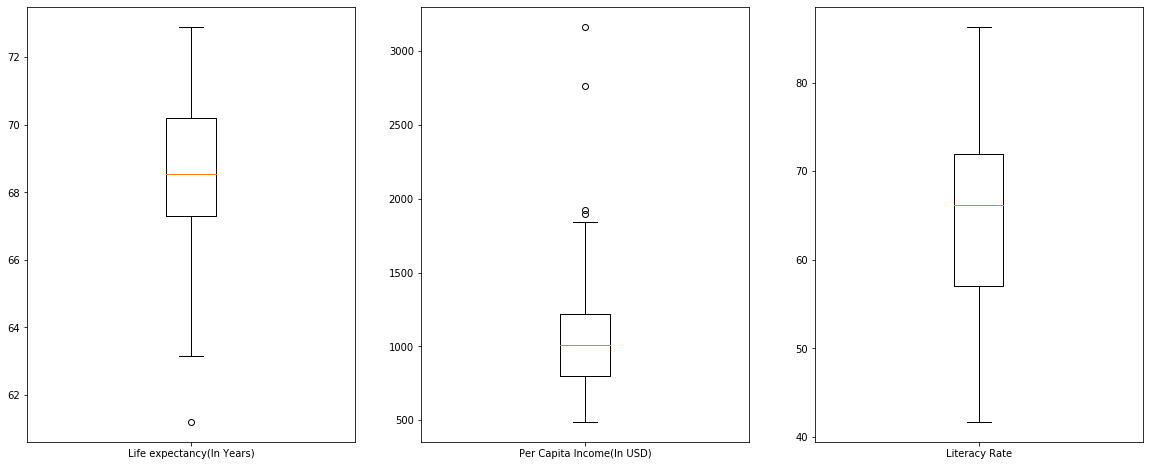

In [31]:
labels = district_df.columns
f, axs = plt.subplots(1, len(labels)-1, figsize=(20,8))
for i in range(1, len(labels)):
    ax = plt.subplot(1, len(labels)-1, i)
    ax.boxplot(district_df[labels[i]], labels=[labels[i]])

Life expectancy and Per Capita Income have outliers.

**Note**: If a data point is below Q1 – 1.5×IQR or above Q3 + 1.5×IQR, it is viewed as being too far from the central values to be reasonable, it is considered as an outlier. See [this link](https://www.purplemath.com/modules/boxwhisk3.htm) for details.

In [32]:
district_df.loc[district_df['Life expectancy(In Years)'].idxmin()]

District                     Dolpa
Life expectancy(In Years)     61.2
Per Capita Income(In USD)     1040
Literacy Rate                 54.1
Name: 74, dtype: object

In [33]:
upper_quartile = np.percentile(district_df['Per Capita Income(In USD)'], 75)
print('Upper Quartile: ', upper_quartile)
lower_quartile = np.percentile(district_df['Per Capita Income(In USD)'], 25)
iqr = upper_quartile - lower_quartile
district_df[district_df['Per Capita Income(In USD)'] > (upper_quartile + (1.5*iqr))]

Upper Quartile:  1219.0


,District,Life expectancy(In Years),Per Capita Income(In USD),Literacy Rate
16,Lalitpur,70.30,1894.0,82.5
37,Kathmandu,68.55,2764.0,86.3
67,Mustang,65.04,1922.0,66.2
68,Manang,65.04,3166.0,74.8


## Standardization

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()
X = district_df.drop(columns=['District'])
scaler.fit(X)
scaled_data = scaler.transform(X)
scaled_data.shape

(75, 3)

In [36]:
pd.DataFrame(scaled_data).describe().round(4)

,0,1,2
count,75.0000,75.0000,75.0000
mean,-0.0000,0.0000,-0.0000
std,1.0067,1.0067,1.0067
min,-3.2218,-1.3471,-2.4724
25%,-0.5010,-0.6415,-0.8514
50%,0.0647,-0.1655,0.1149
75%,0.7980,0.3162,0.7168
max,2.0098,4.7403,2.2375


## Clustering

### 1. DBSCAN 

In [37]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [38]:
neighbors = NearestNeighbors(n_neighbors=9)
nbrs = neighbors.fit(scaled_data)
distances, indices = nbrs.kneighbors(scaled_data)
distances.shape

(75, 9)

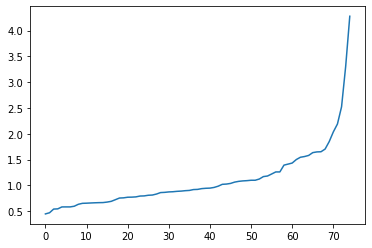

In [39]:
distances = np.sort(distances, axis=0)
distances_ = distances[:, 8]
plt.plot(distances_)

In [40]:
min_samples = 4 # Rule of thumb - use dimension (no. of columns) + 1
eps = 1.75

## Visualize the clusters

In [41]:
from collections import Counter
from sklearn.decomposition import PCA
import plotly.express as px

In [63]:
def visualize_clusters(eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan.fit(scaled_data)
    district_df['DBSCAN Label'] = dbscan.labels_
    counter = Counter(district_df['DBSCAN Label'])
    print(counter)
    
    pca = PCA(n_components=2, random_state=101)
    pca = pca.fit(scaled_data)
    scaled_transformed = pca.transform(scaled_data)
    
    plot_data = pd.DataFrame(scaled_transformed, columns = ['C1', 'C2'])
    plot_data['Label'] = dbscan.labels_
    plot_data['District'] = district_df['District'].tolist()
    
    fig = px.scatter(plot_data, x='C1', y='C2', color='Label', hover_data=['District'])
    fig.show()
    
    return counter.keys()

In [64]:
visualize_clusters(eps, min_samples)

Counter({0: 73, -1: 2})


dict_keys([0, -1])

In [71]:
min_samples_set = np.arange(3, 5)
eps_set = np.arange(0.1, 5, 0.05)
for i in min_samples_set:
    for j in eps_set:
        dbscan = DBSCAN(eps=j, min_samples=i)
        dbscan.fit(scaled_data)
        district_df['DBSCAN Label'] = dbscan.labels_
        
        print('min_samples: ', i, ', eps: ', j)
        print(Counter(district_df['DBSCAN Label']))
        print('')

min_samples:  3 , eps:  0.1
Counter({-1: 75})

min_samples:  3 , eps:  0.15000000000000002
Counter({-1: 75})

min_samples:  3 , eps:  0.20000000000000004
Counter({-1: 72, 0: 3})

min_samples:  3 , eps:  0.25000000000000006
Counter({-1: 69, 0: 3, 1: 3})

min_samples:  3 , eps:  0.30000000000000004
Counter({-1: 62, 1: 7, 0: 3, 2: 3})

min_samples:  3 , eps:  0.3500000000000001
Counter({-1: 58, 2: 8, 0: 3, 1: 3, 3: 3})

min_samples:  3 , eps:  0.40000000000000013
Counter({-1: 54, 2: 8, 3: 4, 0: 3, 1: 3, 4: 3})

min_samples:  3 , eps:  0.45000000000000007
Counter({-1: 39, 1: 22, 2: 6, 0: 4, 3: 4})

min_samples:  3 , eps:  0.5000000000000001
Counter({-1: 38, 1: 22, 2: 6, 0: 5, 3: 4})

min_samples:  3 , eps:  0.5500000000000002
Counter({-1: 30, 0: 29, 1: 6, 2: 6, 3: 4})

min_samples:  3 , eps:  0.6000000000000002
Counter({1: 30, -1: 21, 0: 8, 3: 6, 4: 4, 2: 3, 5: 3})

min_samples:  3 , eps:  0.6500000000000001
Counter({0: 44, -1: 20, 2: 8, 1: 3})

min_samples:  3 , eps:  0.7000000000000002
C

min_samples:  4 , eps:  4.650000000000001
Counter({0: 75})

min_samples:  4 , eps:  4.700000000000001
Counter({0: 75})

min_samples:  4 , eps:  4.750000000000001
Counter({0: 75})

min_samples:  4 , eps:  4.800000000000002
Counter({0: 75})

min_samples:  4 , eps:  4.850000000000001
Counter({0: 75})

min_samples:  4 , eps:  4.900000000000001
Counter({0: 75})

min_samples:  4 , eps:  4.950000000000001
Counter({0: 75})



In [65]:
clusters = visualize_clusters(0.7, 3)

Counter({0: 44, -1: 16, 3: 8, 2: 4, 1: 3})


In [66]:
def display_districts_by_cluster(clusters):
    for i in clusters:
        print('Outliers: ' if i==-1 else 'Cluster: ', district_df[district_df['DBSCAN Label']==i]['District'].tolist(), '\n')

In [68]:
display_districts_by_cluster(clusters)

Outliers:  ['Ramechhap', 'Saptari', 'Siraha', 'Rasuwa', 'Bara', 'Lalitpur', 'Solukhumbu', 'Kathmandu', 'Taplejung', 'Mugu', 'Mustang', 'Manang', 'Pyuthan', 'Humla', 'Jumla', 'Dolpa'] 

Cluster:  ['Gorkha', 'Lamjung', 'Dhading', 'Kavrepalanchok', 'Dolakha', 'Nuwakot', 'Okhaldhunga', 'Parbat', 'Parsa', 'Khotang', 'Tanahu', 'Myagdi', 'Sindhuli', 'Syangja', 'Sindhupalchok', 'Udayapur', 'Morang', 'Darchula', 'Dhankuta', 'Baitadi', 'Baglung', 'Salyan', 'Arghakhanchi', 'Sankhuwasabha', 'Rukum', 'Banke', 'Sunsari', 'Bhojpur', 'Rupandehi', 'Palpa', 'Panchthar', 'Gulmi', 'Makwanpur', 'Tehrathum', 'Dailekh', 'Ilam', 'Dadeldhura', 'Nawalparasi', 'Dang', 'Jhapa', 'Surkhet', 'Bardiya', 'Kanchanpur', 'Kailali'] 

Cluster:  ['Rautahat', 'Sarlahi', 'Dhanusa', 'Mahottari'] 

Cluster:  ['Kaski', 'Bhaktapur', 'Chitwan'] 

Cluster:  ['Kapilbastu', 'Achham', 'Doti', 'Jajarkot', 'Rolpa', 'Bajhang', 'Bajura', 'Kalikot'] 



In [69]:
clusters = visualize_clusters(0.6, 3)

Counter({1: 30, -1: 21, 0: 8, 3: 6, 4: 4, 2: 3, 5: 3})


In [70]:
display_districts_by_cluster(clusters)

Outliers:  ['Ramechhap', 'Saptari', 'Siraha', 'Rautahat', 'Rasuwa', 'Kaski', 'Bara', 'Bhaktapur', 'Lalitpur', 'Chitwan', 'Solukhumbu', 'Kathmandu', 'Kapilbastu', 'Taplejung', 'Mugu', 'Mustang', 'Manang', 'Pyuthan', 'Humla', 'Jumla', 'Dolpa'] 

Cluster:  ['Gorkha', 'Dhading', 'Dolakha', 'Nuwakot', 'Okhaldhunga', 'Parsa', 'Sindhuli', 'Sindhupalchok'] 

Cluster:  ['Lamjung', 'Kavrepalanchok', 'Parbat', 'Khotang', 'Tanahu', 'Myagdi', 'Syangja', 'Udayapur', 'Morang', 'Dhankuta', 'Baglung', 'Arghakhanchi', 'Sankhuwasabha', 'Banke', 'Sunsari', 'Bhojpur', 'Rupandehi', 'Palpa', 'Panchthar', 'Gulmi', 'Makwanpur', 'Tehrathum', 'Ilam', 'Nawalparasi', 'Dang', 'Jhapa', 'Surkhet', 'Bardiya', 'Kanchanpur', 'Kailali'] 

Cluster:  ['Sarlahi', 'Dhanusa', 'Mahottari'] 

Cluster:  ['Darchula', 'Baitadi', 'Salyan', 'Rukum', 'Dailekh', 'Dadeldhura'] 

Cluster:  ['Achham', 'Doti', 'Jajarkot', 'Rolpa'] 

Cluster:  ['Bajhang', 'Bajura', 'Kalikot'] 



In [72]:
from IPython.display import Image

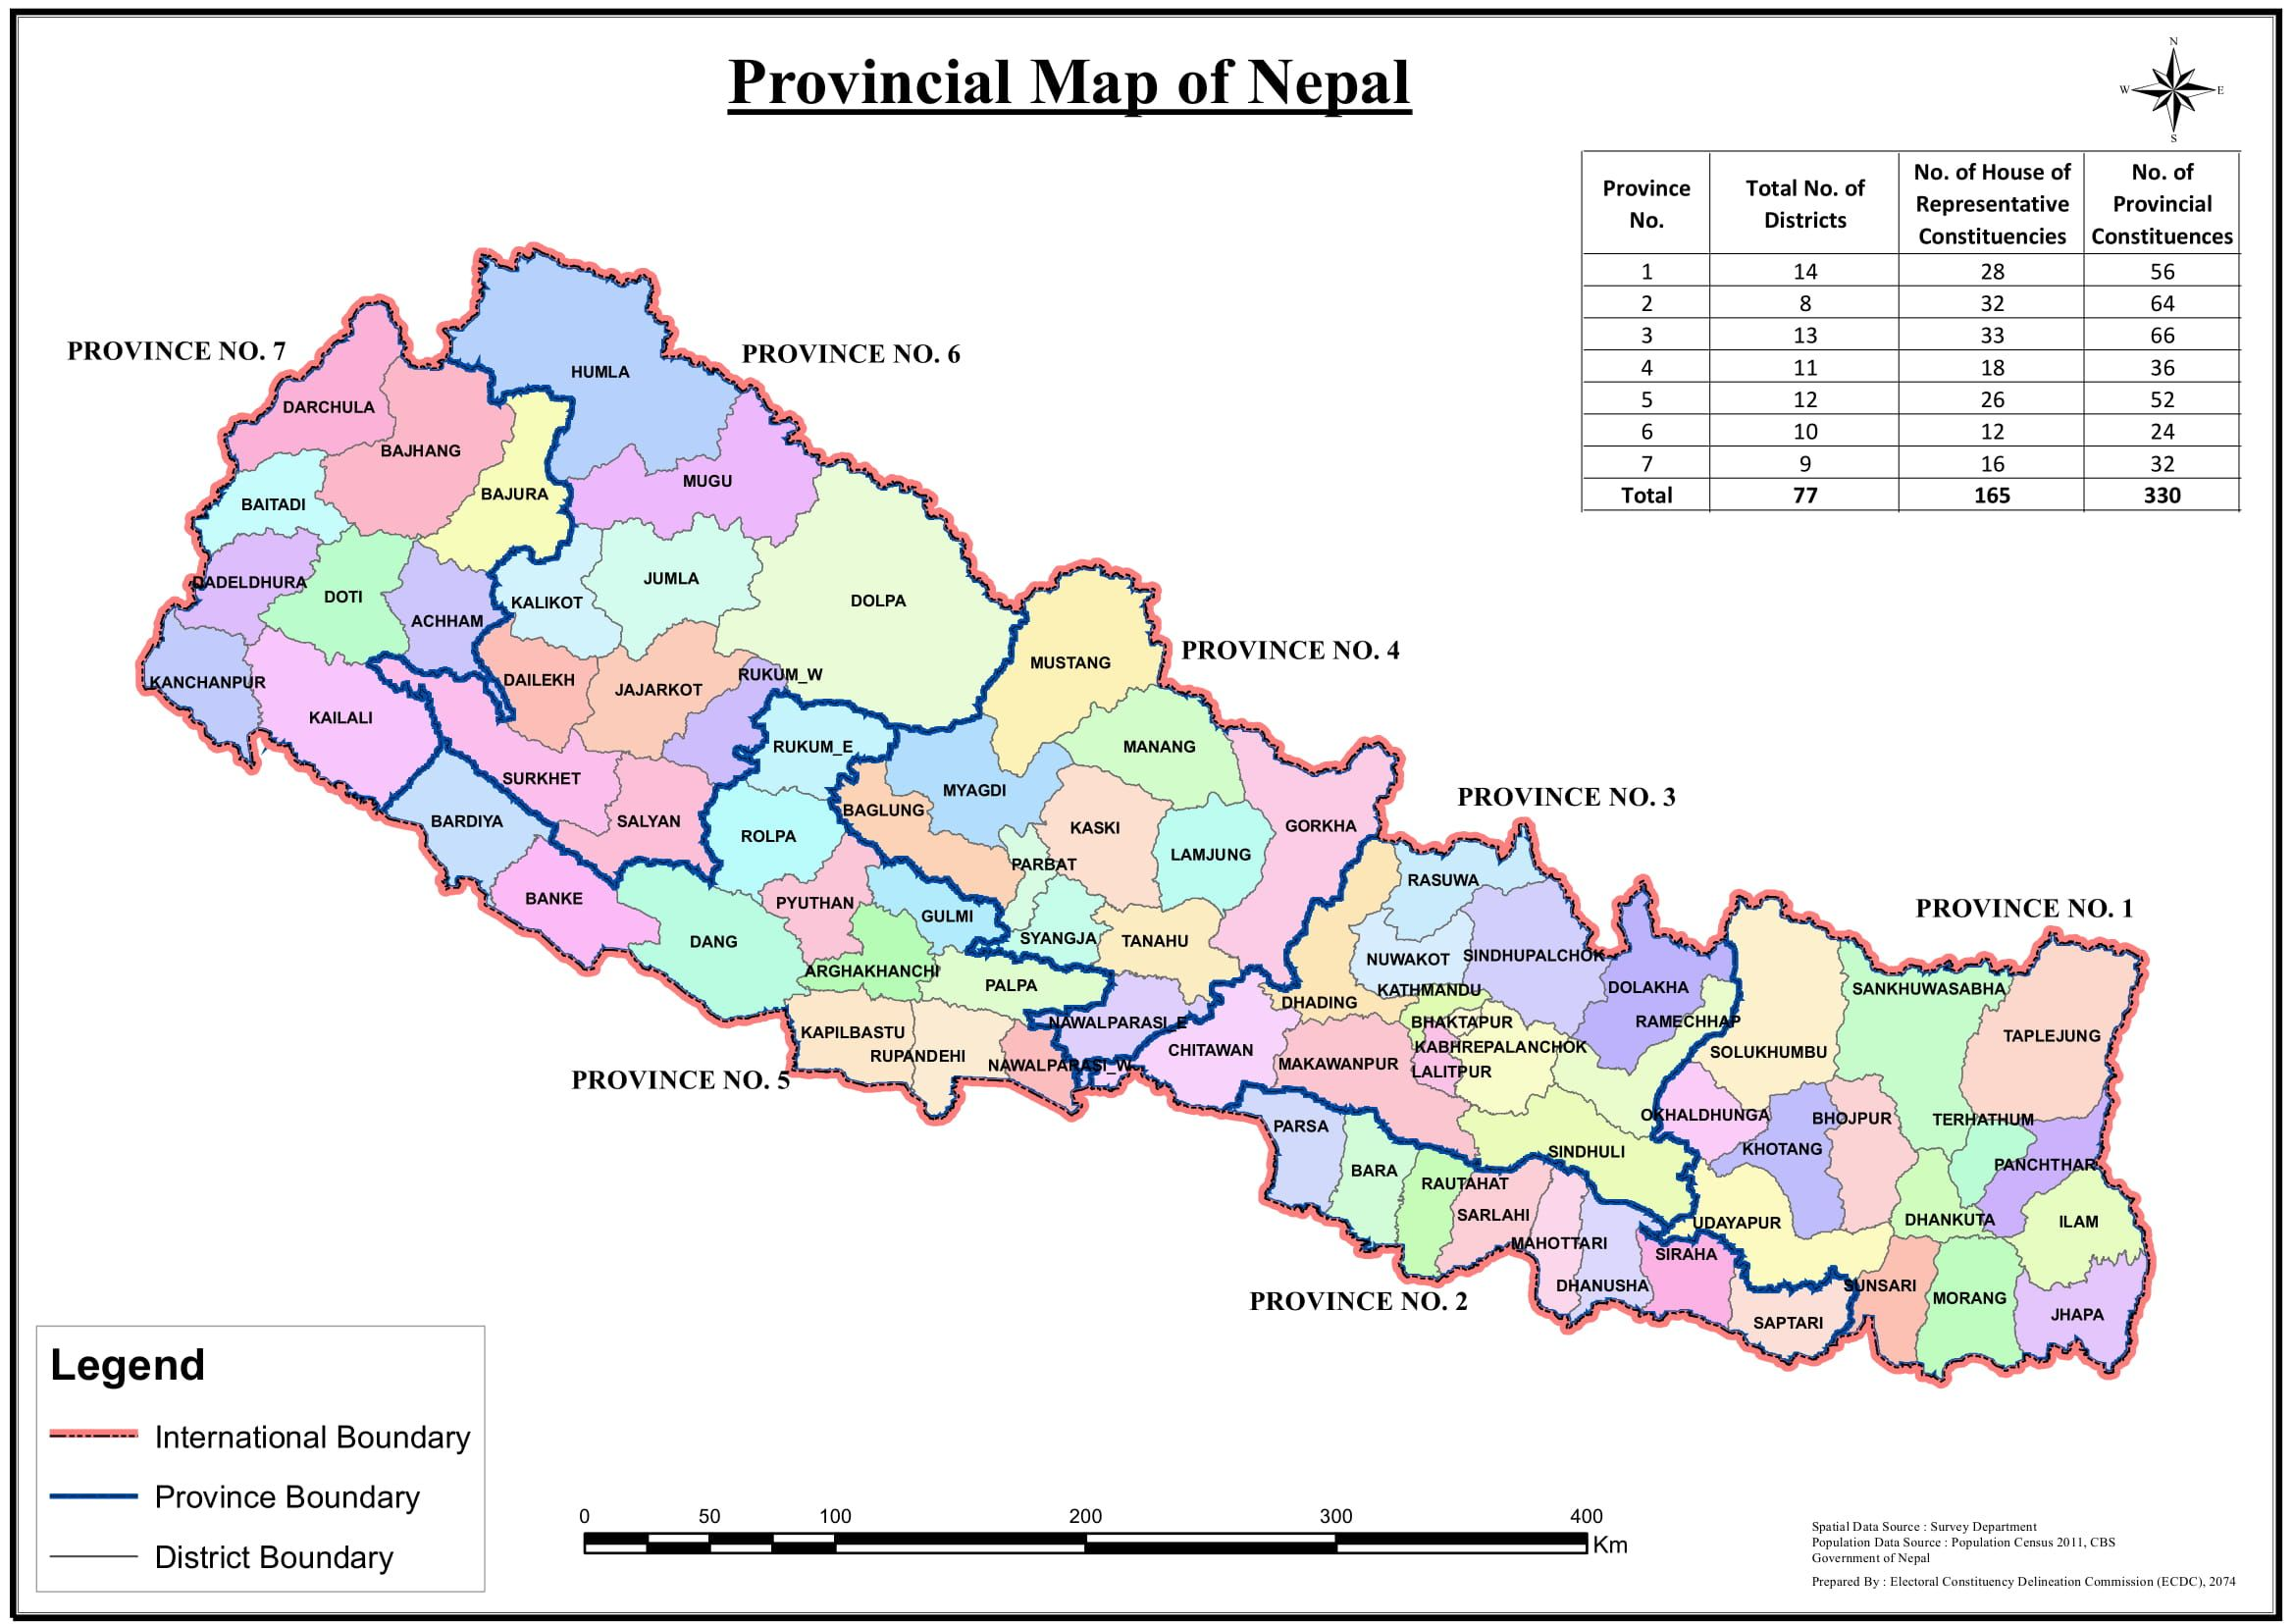

In [77]:
Image('map_of_nepal.jpg')

Image Source: https://www.pinterest.jp/pin/630855860284723833/